# The examples are from [IBM Quantum Learning](https://learning.quantum.ibm.com/)

## [Single Systems](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems#qiskit-examples)

### State vectors

In [19]:
from qiskit.quantum_info import Statevector
import numpy as np

In [20]:
u = Statevector([1, 0])
v = Statevector([0, 1])
w = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
x = Statevector([1/np.sqrt(2), 0])

In [21]:
display(u.draw('latex'))
display(v.draw('latex'))
display(w.draw('latex'))
display(x.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Check if these states are valid

In [22]:
print(f'Is u a valid state?: {u.is_valid()}')
print(f'Is x a valid state?: {x.is_valid()}')

# is_valid checks if the vectors have norm 1

Is u a valid state?: True
Is x a valid state?: False


### Simulating measurements

In [23]:
# create a state v
v = Statevector([1+3.0j, -5]/np.sqrt(35))
v.draw('latex')

<IPython.core.display.Latex object>

In [24]:
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

{'0': 2822, '1': 7178}

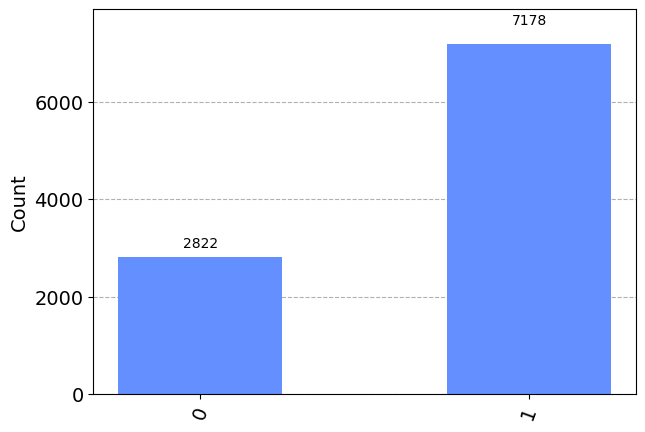

In [25]:
# visualize by histogram
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(10000)
display(statistics)
plot_histogram(statistics)

In [26]:
# let's calulate the actual probability vs the measured probabilities

# empirical probabilities
print(f'The empirical probability of outcome 0 is: {statistics['0']/10000}')
print(f'The empirical probability of outcome 1 is: {statistics['1']/10000} \n')

# actual probabilities
probabilities = v.probabilities()

print(f'The actual probability of outcome 0 is: {probabilities[0]}')
print(f'The actual probability of outcome 1 is: {probabilities[1]}')

The empirical probability of outcome 0 is: 0.2822
The empirical probability of outcome 1 is: 0.7178 

The actual probability of outcome 0 is: 0.28571428571428575
The actual probability of outcome 1 is: 0.7142857142857141


Using `Operator`

In [31]:
from qiskit.quantum_info import Operator
from numpy import sqrt

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

Doing the same thing using a `Quantum Circuit`

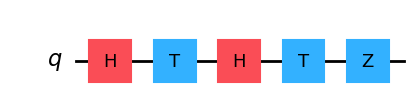

In [28]:
from qiskit import QuantumCircuit

# let us define the circuit first
qc = QuantumCircuit(1)

qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.z(0)

qc.draw('mpl')

In [32]:
# now we have to initialize the starting quantum state vector
ket0 = Statevector([1,0])
v = ket0.evolve(qc)
v.draw('text')

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

{'0': 8494, '1': 1506}

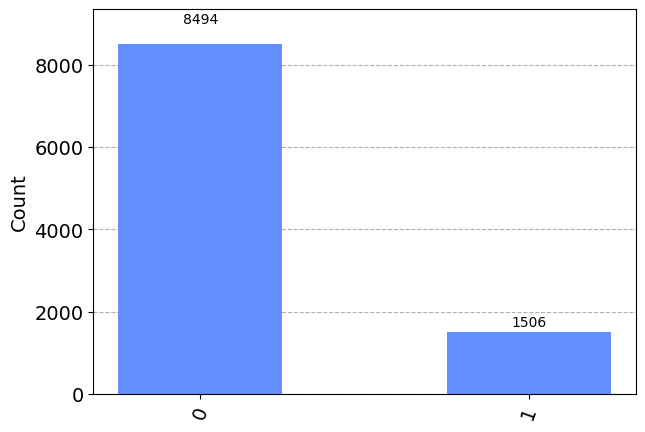

In [34]:
statistics = v.sample_counts(10000)
display(statistics)

plot_histogram(statistics)

## [Multiple systems](https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems#qiskit-examples)